## Loan Application Status Prediction 

By - Sajad Abdul Manaf

Batch - DS0522

Problem Statement:
    
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 


data set link - https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

#### Library Imports/Data Wrangling/Data Cleaning

In [2]:
import pandas as pd #  data wrangling 
import numpy as np # computation 
import seaborn as sns # Visualization 
import matplotlib.pyplot as plt # plot package
%matplotlib inline
import warnings # Filter warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [4]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])
df.head()

No of Rows: 614
No. of Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Data Integrity Check

In [7]:
#1. Duplicate Check

df.duplicated().sum()

0

- No Duplicate records

In [8]:
#2. Data type Check

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- Loanapplication status dataset we have 614 rows with 13 columns including target variable.
-  Target Variable - 'Loan_Status' having object datatype also It is a categorical variable.
- Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features.
- There are three types of datatype dtypes: float64(4), int64(1), object

#### Missing value check

<AxesSubplot:>

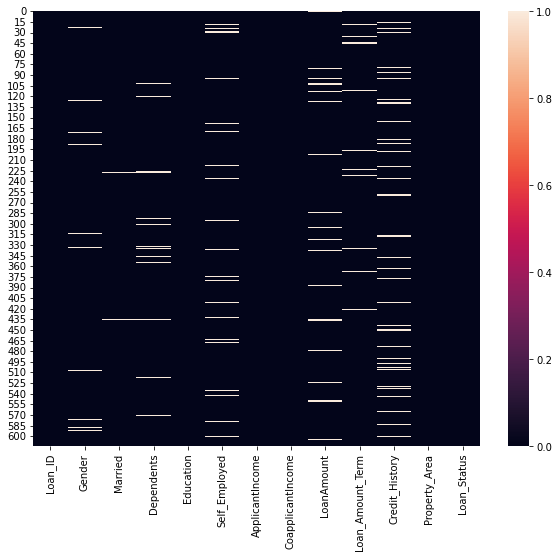

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

- We can see lot of features are having missing values

In [10]:
# missing Value in %
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


- 7/13 columns contains missing value.
- Only small amount of data are (>10%) missing, we need to sue mean amd mode to replace the NaN values

In [11]:
# Listing different Categorical variables available

In [12]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


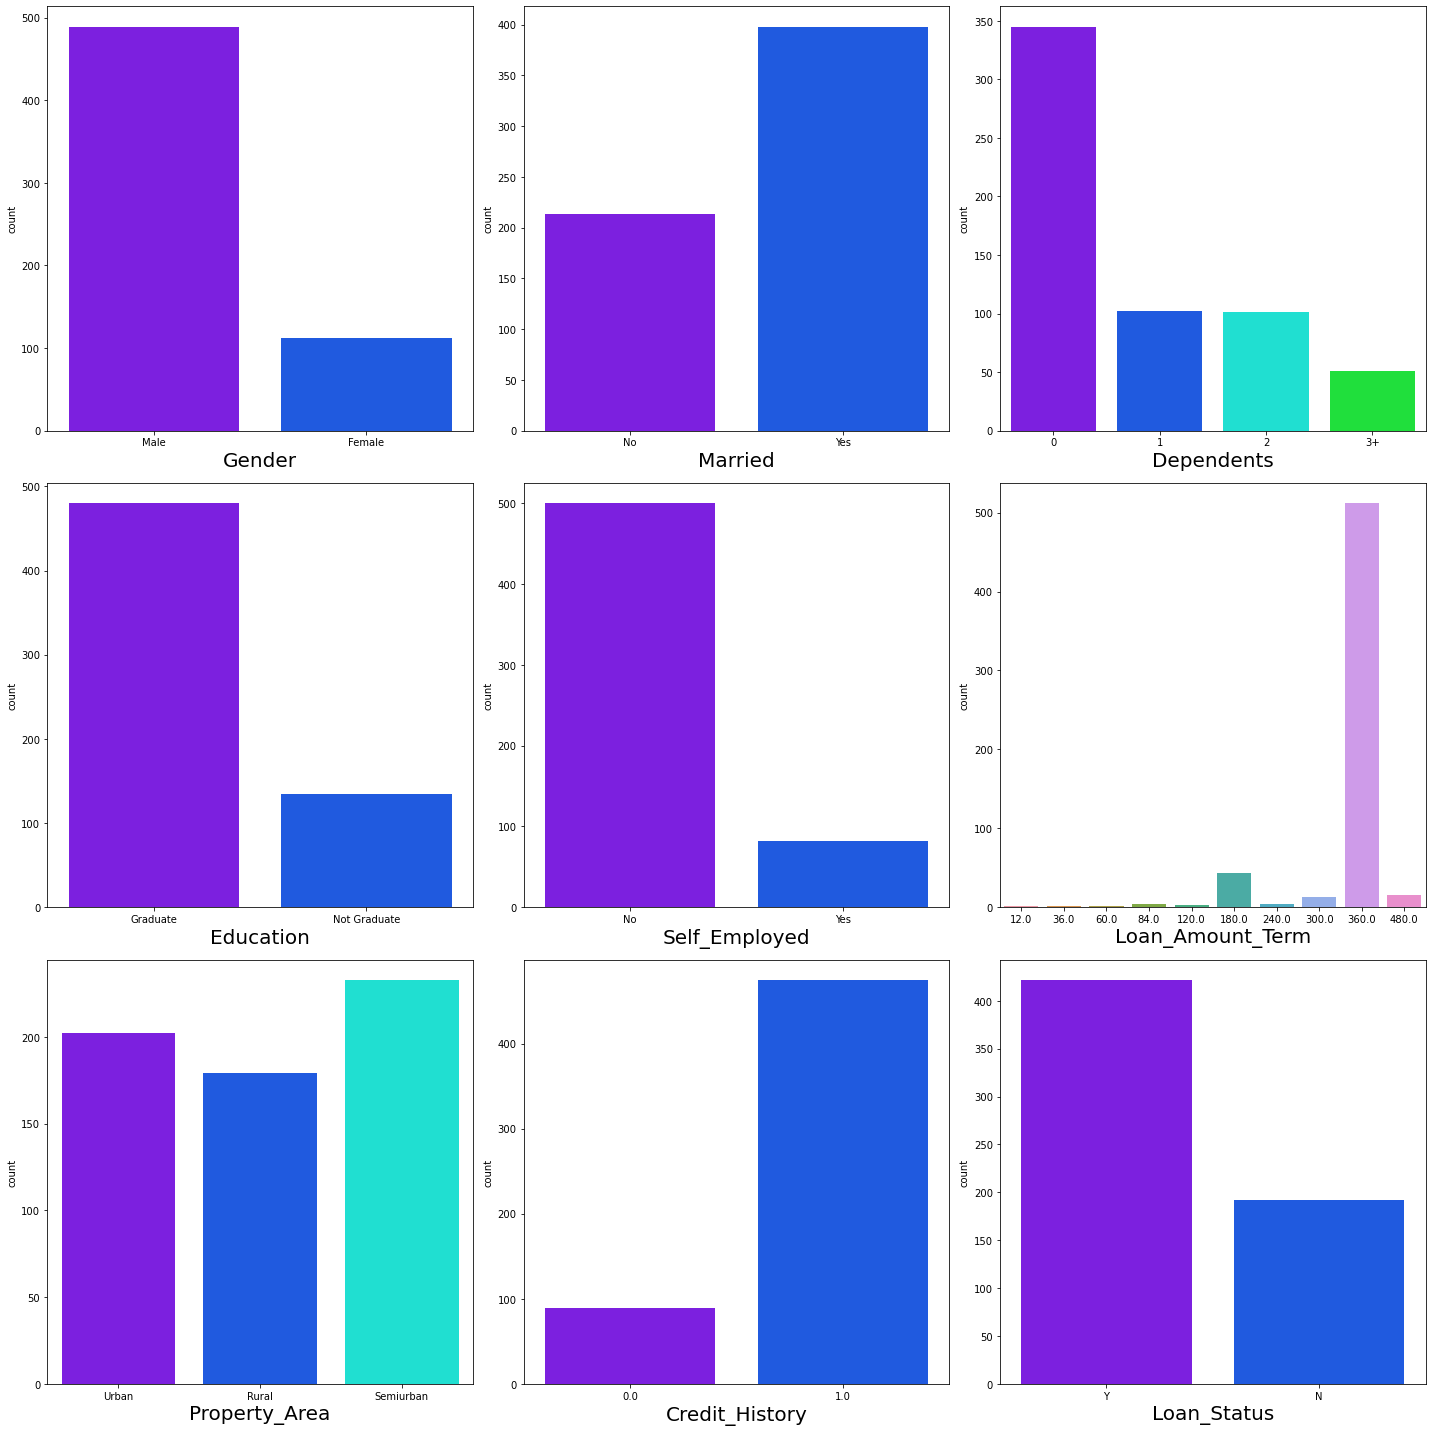

In [13]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

- 80 % Total applicants are Males. 
- Only 20% applicants are self employed. 
- Nearly 70% are married and 75% of loan applicants are graduates
- Almost 60% of the applicants have no dependents.
- Most of applicants come from Semi Urban areas, followed by Urban and Rural areas.
- 80% people previously have credit history. .
- Approximately 70 % applicant gets loan approved.

- We need to impute the missing Values

In [14]:
#Missing Values and Outliers echck using BOX plot

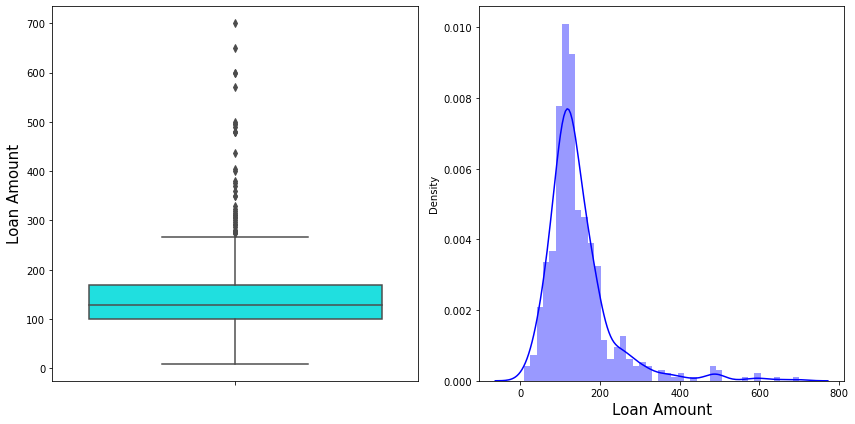

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [17]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


- The mean is greater than median loan amount.
- Clearly we can see outliers in boxplot and feature is strecth to far in distribution plot.
- Outliers are present in feature and for that reason as data is more sensitive to mean we are going to impute missing values in loan amount with median

####  Imputation 
- Missing values in Loan amount is impute with median value.
- Maximum Loan term is 360 Months so Missing value in Loan amount term is replace with 360 Months.
- Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.

In [18]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [19]:
# data Check after imputation

missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


<AxesSubplot:>

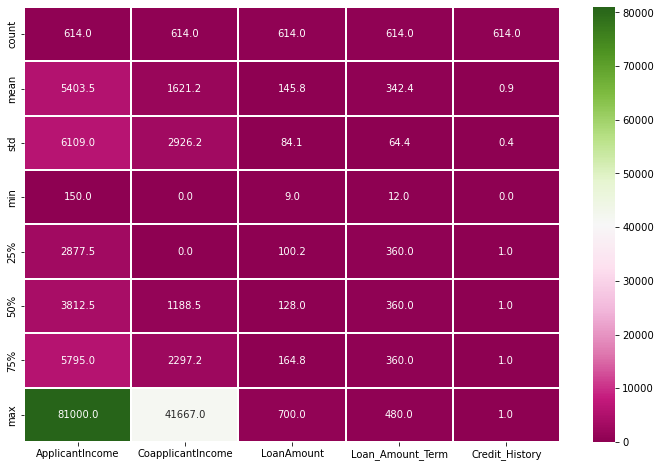

In [20]:
#Statistical Matrix

# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


- In Applicant Income & Coapplicant Income Std deviation value is greater than median. So data is spread and skewed.
- Taking 75% and Max rows into consideration we can surely say that Outliers exist in Applicant Income, Coapplicant Income,Loan Amount.
- Since Credit History is Categorical variable there is no significance in different statstical parameter of it.
- Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.
- Minimum Applicant income is 150 and maximum is 81000.

#### Target and independent feature chcek

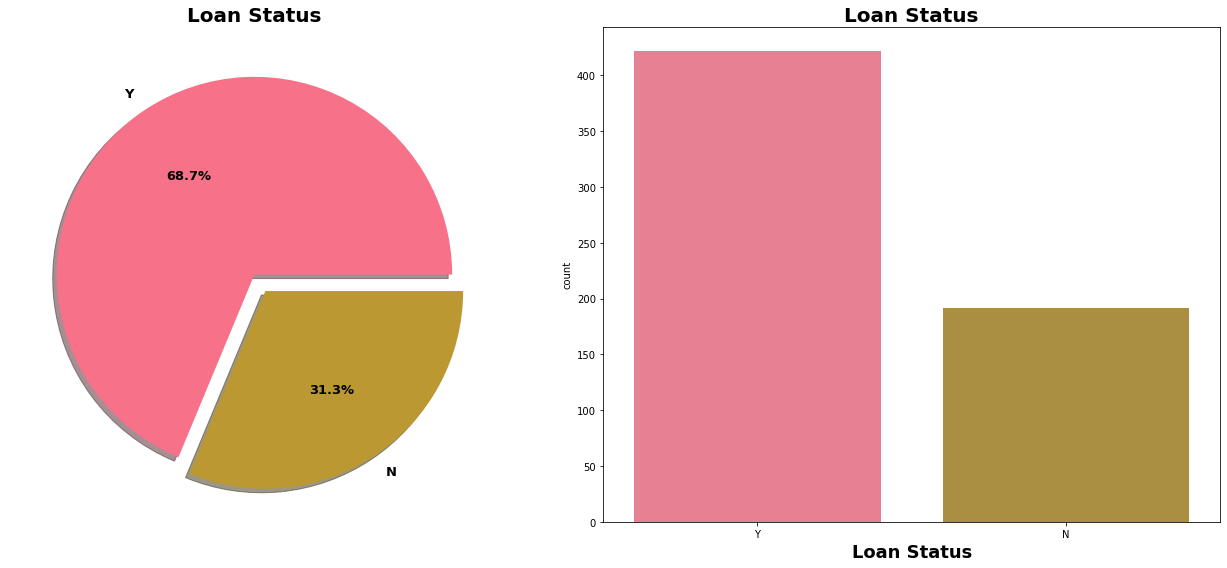

In [22]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.show()

- Dataset is imbalanced in nature, we need to balance it.

#### Gender Vs Loan Status

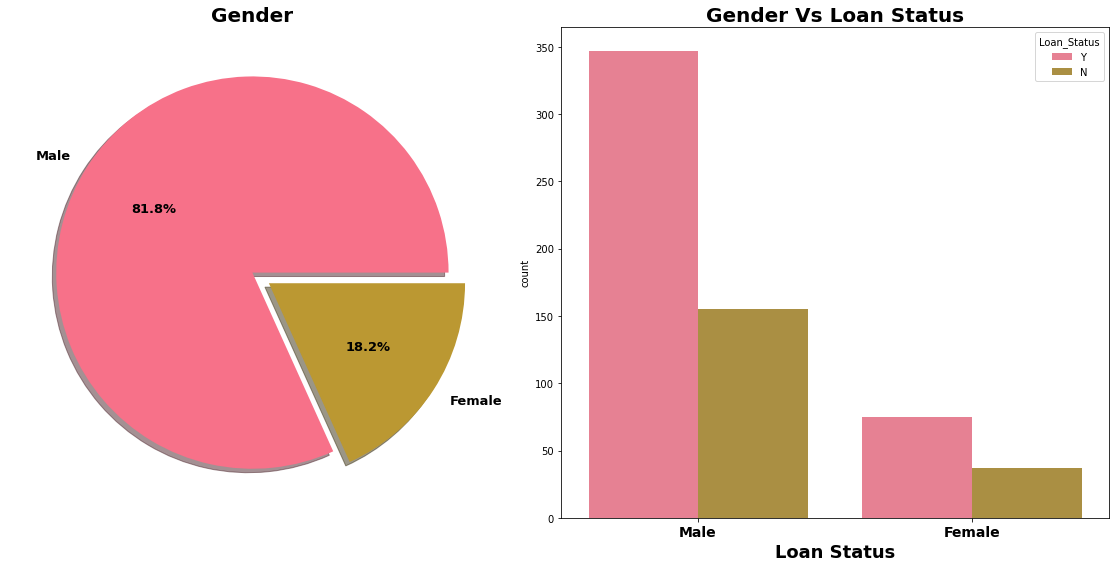

In [23]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Gender',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [24]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


81.8% Applicant are male.
Irrespective Gender 65 % Applicant from each gender gets loan approval.which says Gender has no role in deciding the outcome.

#### Married Vs Loan Status

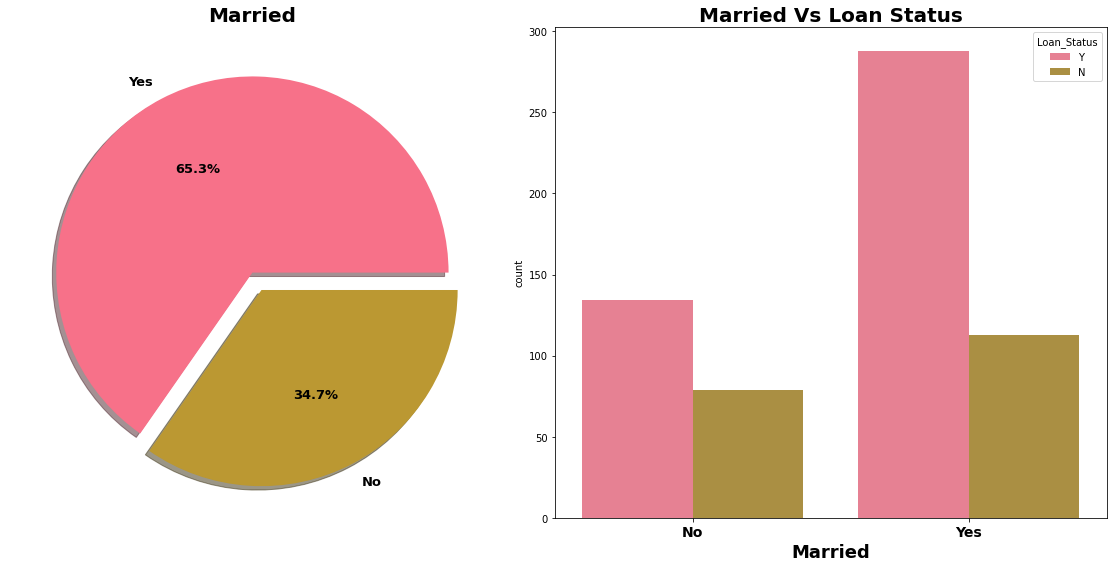

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Married',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [26]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow_r')

- 65.3 % loan applicants are married. also can see that Count plot of Married people have more possibility of getting loan approval.
- But Here comes Interesting observation from crosstab :
- Unmarried Women are more chances of getting loan approval compare to married women.

#### dependents v/s status

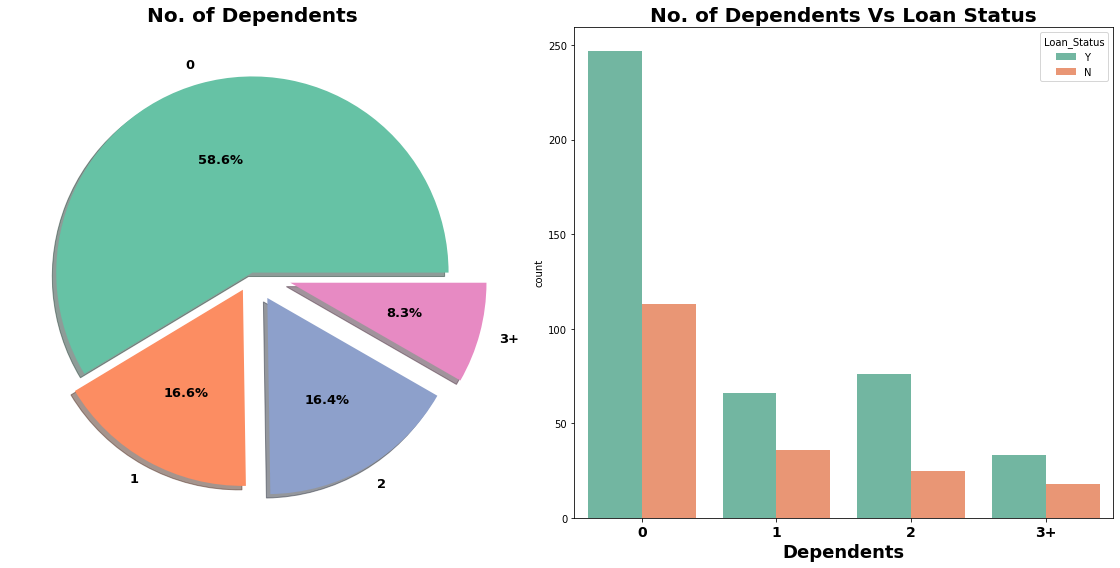

In [27]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [28]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [29]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

- 58.6% Applicants have no dependents on them.33% Applicants have either 1 or 2 dependents. 
- Female having zero dependents have more chances to get loan approval compare to Females with dependents.
- For male Maximum loan approval comes with 0 dependents followed by 2 dependents.

#### Education Vs Loan status

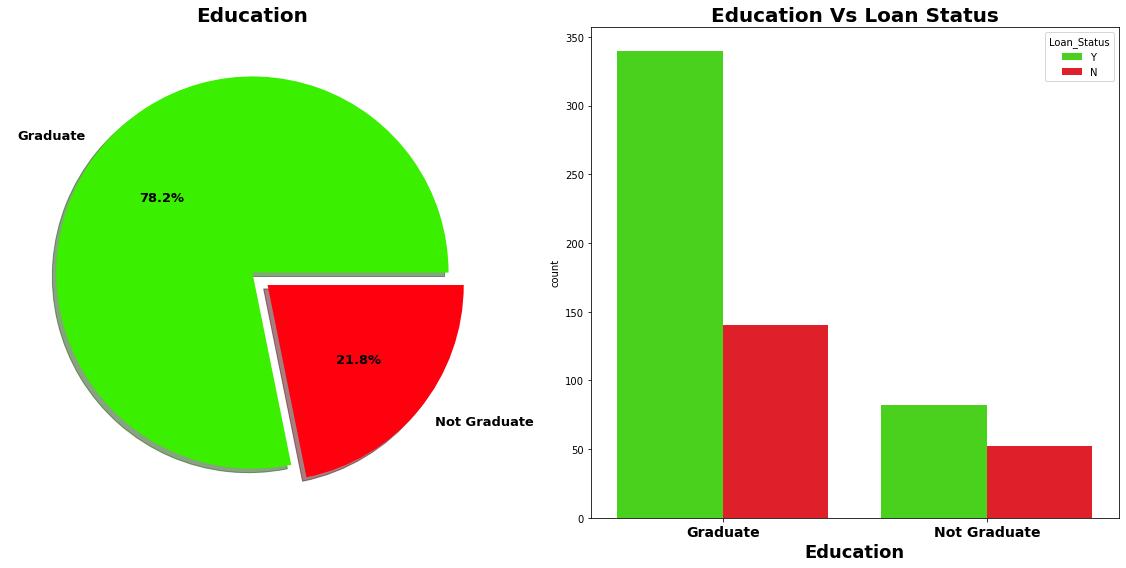

In [30]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [31]:
pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

- Graduate applicants are more likely to get loan approval irrespective gender.

#### Encoding categorical data

In [32]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [33]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


#### Feature Selection/Engineering

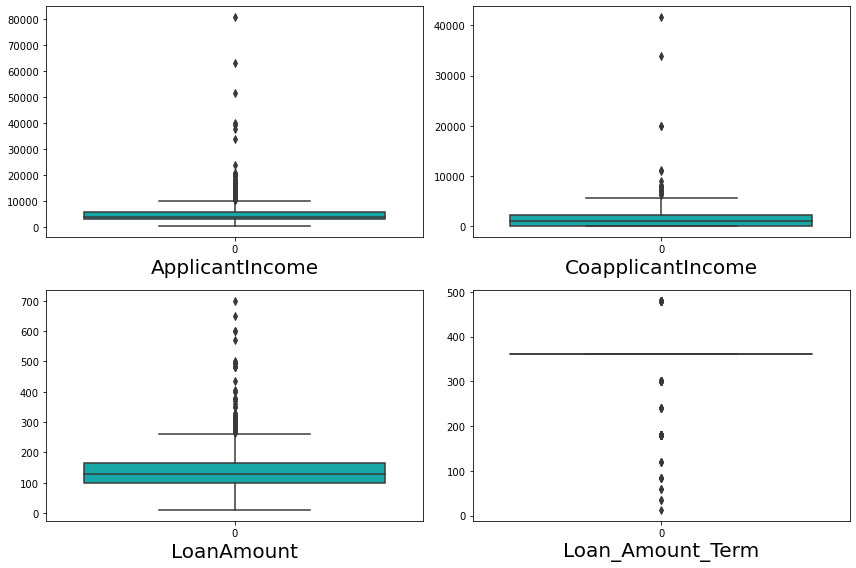

In [34]:
# Outliers Treatment

Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data = df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

- Outliers are Existisng for almost all of the features

In [35]:
# Loan ID is unnecessary column and can be deleted


df.drop(["Loan_ID"], axis=1, inplace=True)

In [36]:
# Dependents are having some value 3+ - this needs to be treated
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [37]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [38]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


Pct of Data Loss >10 which is acceptable 

#### Skewness Check

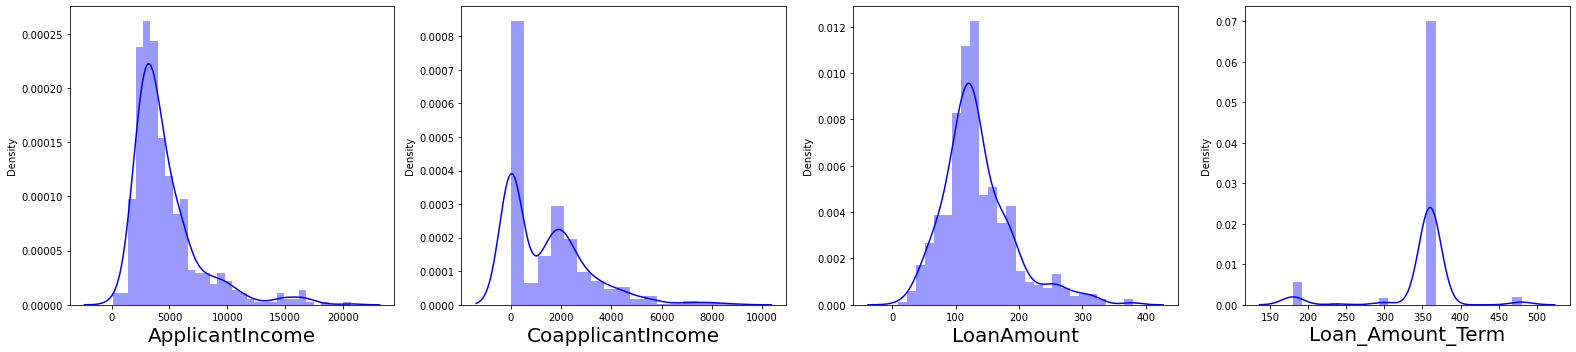

In [40]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [41]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

- Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed.
- Other features are categorical in nature so skewness is nothing to do with these remaining feature, can ignore them
- We can use yeo-johnson transformation method.

In [42]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [43]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [44]:
## Skewness check after yeo-johnson transformation
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

- All neumerical features skewness reduced to optimum

#### Correlation Checks

In [45]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


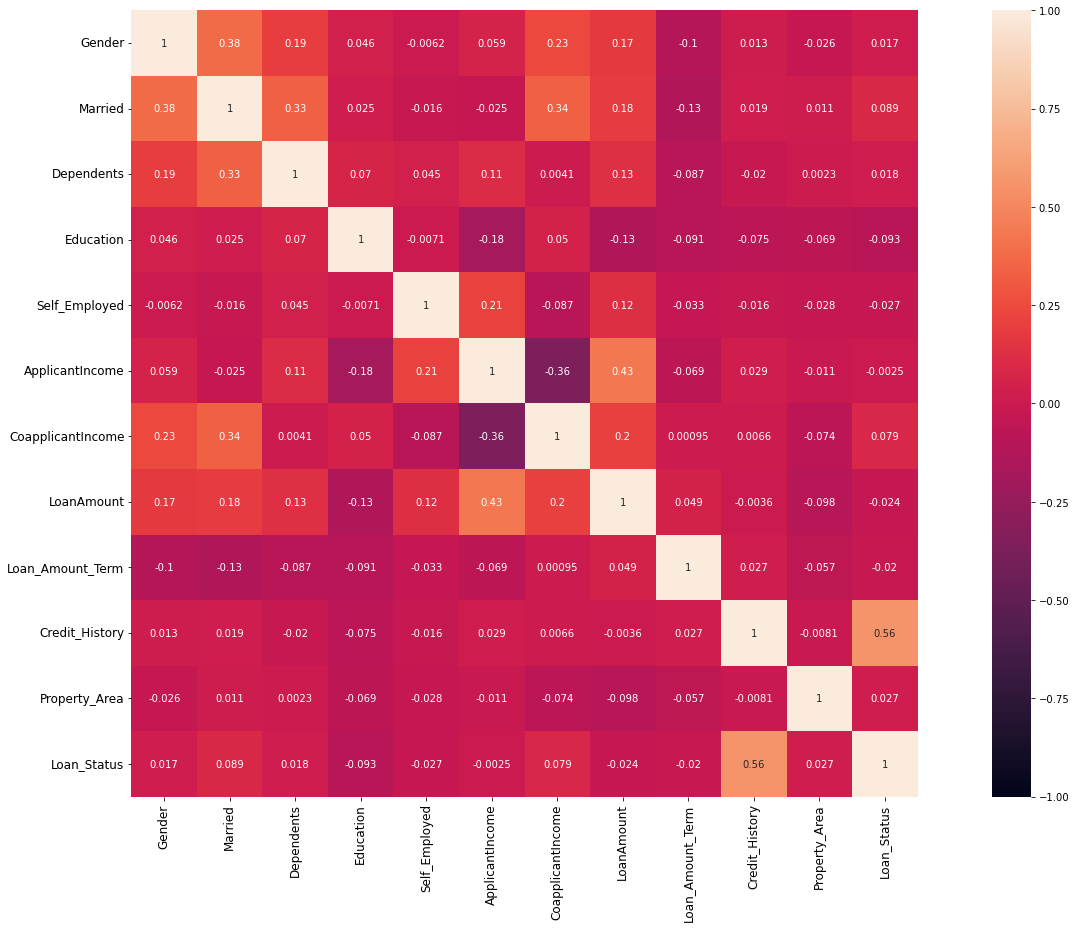

In [46]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, 
            annot_kws={'size':10})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

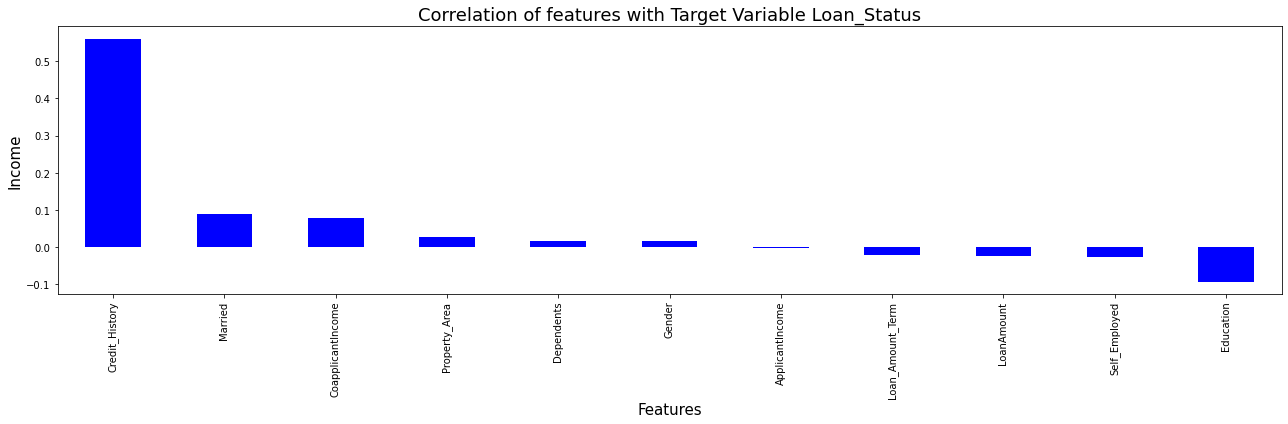

In [48]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'blue')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

- Correlation are moderate and higest is 0.56, which are between Credit history and loan status

In [50]:
#### Multicolinearity between features using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


- VIF is in the permissible limits, which is 10

#### Balancing the Traget variable using SMOTE

In [51]:
df.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [55]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [56]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

target variable samples balanced

#### Standard Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

#### ML Model Building

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


### Finding best Random state

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.803347280334728 on Random_state 10


In [62]:
#### Logostic Regression Model

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=10, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.803347280334728


Confusion matrix of Logistics Regression : 
 [[ 73  38]
 [  9 119]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.89      0.66      0.76       111
           1       0.76      0.93      0.84       128

    accuracy                           0.80       239
   macro avg       0.82      0.79      0.80       239
weighted avg       0.82      0.80      0.80       239



#### Optimal value of n_neighbors for KNN

In [63]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.5052030537546389
RMSE value for k=  2 is: 0.556438164545121
RMSE value for k=  3 is: 0.513418276223035
RMSE value for k=  4 is: 0.5488672244956179
RMSE value for k=  5 is: 0.5215041008435626
RMSE value for k=  6 is: 0.5373108307770214
RMSE value for k=  7 is: 0.5174769818825207
RMSE value for k=  8 is: 0.5334030637818674
RMSE value for k=  9 is: 0.4968520148758506
RMSE value for k=  10 is: 0.5052030537546389
RMSE value for k=  11 is: 0.5052030537546389
RMSE value for k=  12 is: 0.4968520148758506
RMSE value for k=  13 is: 0.50104493321917
RMSE value for k=  14 is: 0.49262341019056577
RMSE value for k=  15 is: 0.5093272287453544
RMSE value for k=  16 is: 0.5052030537546389
RMSE value for k=  17 is: 0.513418276223035
RMSE value for k=  18 is: 0.5093272287453544
RMSE value for k=  19 is: 0.5052030537546389
RMSE value for k=  20 is: 0.5093272287453544
RMSE value for k=  21 is: 0.4968520148758506
RMSE value for k=  22 is: 0.4883581921595791
RMSE value for k=  23 i

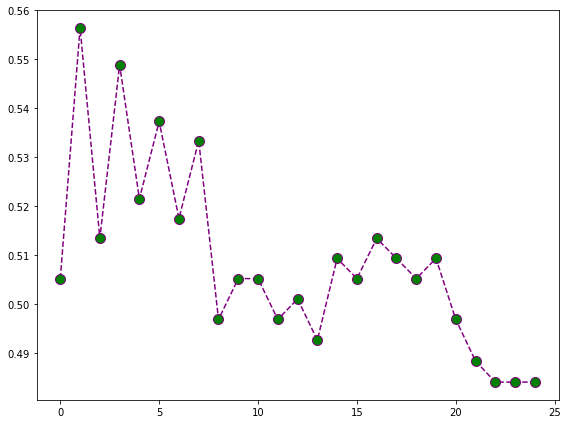

In [64]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='purple', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

In [ ]:
###

#### Other Classification algorithms

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7866108786610879


Confusion matrix : 
 [[ 72  39]
 [ 12 116]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.65      0.74       111
           1       0.75      0.91      0.82       128

    accuracy                           0.79       239
   macro avg       0.80      0.78      0.78       239
weighted avg       0.80      0.79      0.78       239





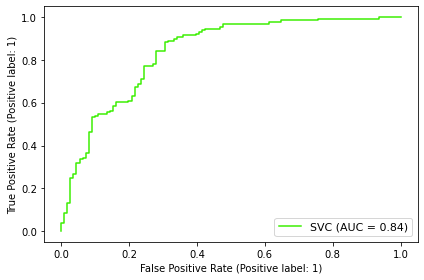

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7698744769874477


Confusion matrix : 
 [[ 64  47]
 [  8 120]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.58      0.70       111
           1       0.72      0.94      0.81       128

    accuracy                           0.77       239
   macro avg       0.80      0.76      0.76       239
weighted avg       0.80      0.77      0.76       239





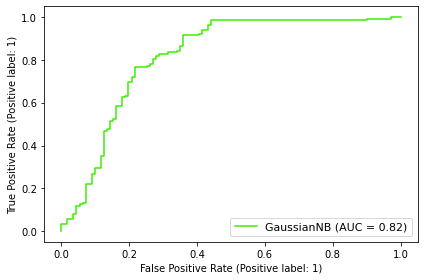

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.702928870292887


Confusion matrix : 
 [[84 27]
 [44 84]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.76      0.70       111
           1       0.76      0.66      0.70       128

    accuracy                           0.70       239
   macro avg       0.71      0.71      0.70       239
weighted avg       0.71      0.70      0.70       239





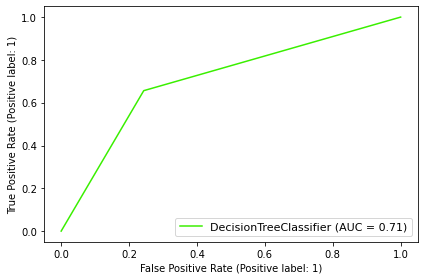

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7364016736401674


Confusion matrix : 
 [[83 28]
 [35 93]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.75      0.72       111
           1       0.77      0.73      0.75       128

    accuracy                           0.74       239
   macro avg       0.74      0.74      0.74       239
weighted avg       0.74      0.74      0.74       239





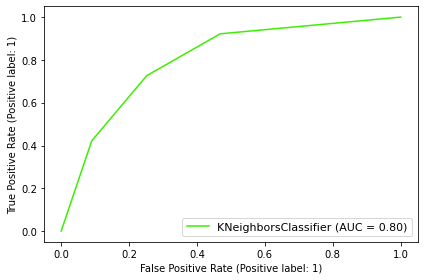

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.7949790794979079


Confusion matrix : 
 [[ 85  26]
 [ 23 105]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       111
           1       0.80      0.82      0.81       128

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239





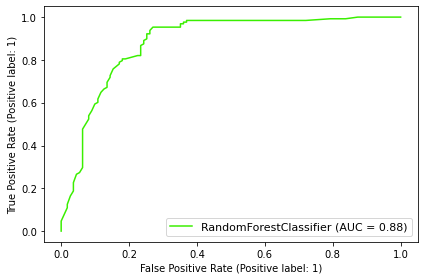

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8326359832635983


Confusion matrix : 
 [[ 91  20]
 [ 20 108]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       111
           1       0.84      0.84      0.84       128

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239





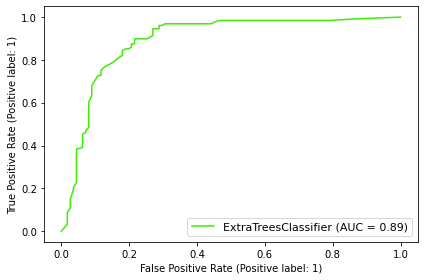

In [65]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')


#### Cross Validation

In [66]:


from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.70625    0.68553459 0.73584906 0.80503145 0.74842767]
Mean Score : 0.7362185534591195
Std deviation : 0.04086903866822037




Cross Validation Score SVC() :

Score : [0.7        0.74842767 0.76100629 0.78616352 0.73584906]
Mean Score : 0.7462893081761006
Std deviation : 0.02850548708921266




Cross Validation Score GaussianNB() :

Score : [0.6875     0.70440252 0.74842767 0.78616352 0.72327044]
Mean Score : 0.7299528301886793
Std deviation : 0.034642971541654306




Cross Validation Score DecisionTreeClassifier() :

Score : [0.775      0.69811321 0.74842767 0.74842767 0.77358491]
Mean Score : 0.7487106918238994
Std deviation : 0.027821286285338892




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.7125     0.74213836 0.71698113 0.74213836 0.74842767]
Mean Score : 0.7324371069182389
Std deviation : 0.014698995890962177




Cross Validation Score RandomForestClassifier() :

Score : [0.8        0.723270

Can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.¶

#### Hyper Parameter Tuning : GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [69]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.714 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.750 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.721 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.676 total time=   0.0s
[CV 5

[CV 1/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.723 total time=   0.0s
[CV 2/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 2/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.795 total time=   0.0s
[CV 3/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 3/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.739 total time=   0.0s
[CV 4/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 4/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.757 total time=   0.0s
[CV 5/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 5/5; 9/168] END bootstrap=True, criterion=gini, max_dept

[CV 3/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.757 total time=   0.0s
[CV 4/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 4/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.784 total time=   0.0s
[CV 5/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 5/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.721 total time=   0.0s
[CV 1/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 1/5; 17/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.723 total time=   0.0s
[CV 2/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 2/5; 17/168] END bootstrap=True, criteri

[CV 3/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.775 total time=   0.0s
[CV 4/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 4/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.748 total time=   0.0s
[CV 5/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 5/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.712 total time=   0.0s
[CV 1/5; 24/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15
[CV 1/5; 24/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15;, score=0.723 total time=   0.0s
[CV 2/5; 24/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15
[CV 2/5; 24/168] END bootstrap=True, criteri

[CV 2/5; 31/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.777 total time=   0.0s
[CV 3/5; 31/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15
[CV 3/5; 31/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.793 total time=   0.0s
[CV 4/5; 31/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15
[CV 4/5; 31/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.793 total time=   0.0s
[CV 5/5; 31/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15
[CV 5/5; 31/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.748 total time=   0.0s
[CV 1/5; 32/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25
[CV 1/5; 32/168] END bootstrap=True, criteri

[CV 3/5; 38/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15;, score=0.775 total time=   0.0s
[CV 4/5; 38/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15
[CV 4/5; 38/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15;, score=0.766 total time=   0.0s
[CV 5/5; 38/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15
[CV 5/5; 38/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=15;, score=0.739 total time=   0.0s
[CV 1/5; 39/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25
[CV 1/5; 39/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25;, score=0.723 total time=   0.0s
[CV 2/5; 39/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25
[CV 2/5; 39/168] END bootstrap=True, criteri

[CV 3/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.784 total time=   0.0s
[CV 4/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 4/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.757 total time=   0.0s
[CV 5/5; 45/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15
[CV 5/5; 45/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.730 total time=   0.0s
[CV 1/5; 46/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25
[CV 1/5; 46/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25;, score=0.750 total time=   0.0s
[CV 2/5; 46/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25
[CV 2/5; 46/168] END bootstrap=True, criteri

[CV 4/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.766 total time=   0.0s
[CV 5/5; 52/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15
[CV 5/5; 52/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=15;, score=0.712 total time=   0.0s
[CV 1/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 1/5; 53/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.750 total time=   0.0s
[CV 2/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 2/5; 53/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.812 total time=   0.0s
[CV 3/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 3/5; 53/168] END bootstrap=True, criteri

[CV 1/5; 60/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.786 total time=   0.0s
[CV 2/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 2/5; 60/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.812 total time=   0.0s
[CV 3/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 3/5; 60/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.829 total time=   0.0s
[CV 4/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 4/5; 60/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.766 total time=   0.0s
[CV 5/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 5/5; 60/168] END bootstrap=True, criteri

[CV 1/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.741 total time=   0.0s
[CV 2/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 2/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.821 total time=   0.0s
[CV 3/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 3/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.793 total time=   0.0s
[CV 4/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 4/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.766 total time=   0.0s
[CV 5/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 5/5; 67/168] END bootstrap=True, criteri

[CV 2/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 2/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.839 total time=   0.0s
[CV 3/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 3/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.838 total time=   0.0s
[CV 4/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 4/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.793 total time=   0.0s
[CV 5/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 5/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.775 total time=   0.0s
[CV 1/5; 75/168] START bootstrap=True, crite

[CV 1/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.759 total time=   0.0s
[CV 2/5; 81/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25
[CV 2/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.821 total time=   0.0s
[CV 3/5; 81/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25
[CV 3/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.811 total time=   0.0s
[CV 4/5; 81/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25
[CV 4/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.784 total time=   0.0s
[CV 5/5; 81/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25
[CV 5/5; 81/168] END bootstrap=True, criteri

[CV 2/5; 88/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25;, score=0.821 total time=   0.0s
[CV 3/5; 88/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25
[CV 3/5; 88/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25;, score=0.730 total time=   0.0s
[CV 4/5; 88/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25
[CV 4/5; 88/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25;, score=0.739 total time=   0.0s
[CV 5/5; 88/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25
[CV 5/5; 88/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=25;, score=0.730 total time=   0.0s
[CV 1/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 1/5; 89/168] END bootstr

[CV 1/5; 95/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.750 total time=   0.0s
[CV 2/5; 95/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25
[CV 2/5; 95/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.804 total time=   0.0s
[CV 3/5; 95/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25
[CV 3/5; 95/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.730 total time=   0.0s
[CV 4/5; 95/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25
[CV 4/5; 95/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.721 total time=   0.0s
[CV 5/5; 95/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25
[CV 5/5; 95/168] END bootstr

[CV 1/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.741 total time=   0.0s
[CV 2/5; 102/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25
[CV 2/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.839 total time=   0.0s
[CV 3/5; 102/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25
[CV 3/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.766 total time=   0.0s
[CV 4/5; 102/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25
[CV 4/5; 102/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25;, score=0.757 total time=   0.0s
[CV 5/5; 102/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=25
[CV 5/5; 102

[CV 2/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.795 total time=   0.0s
[CV 3/5; 109/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25
[CV 3/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.811 total time=   0.0s
[CV 4/5; 109/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25
[CV 4/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.784 total time=   0.0s
[CV 5/5; 109/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25
[CV 5/5; 109/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.793 total time=   0.0s
[CV 1/5; 110/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 1/5; 110

[CV 1/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.750 total time=   0.0s
[CV 2/5; 116/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25
[CV 2/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.848 total time=   0.0s
[CV 3/5; 116/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25
[CV 3/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.856 total time=   0.0s
[CV 4/5; 116/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25
[CV 4/5; 116/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25;, score=0.784 total time=   0.0s
[CV 5/5; 116/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=25
[CV 5/5; 116

[CV 1/5; 123/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.741 total time=   0.0s
[CV 2/5; 123/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25
[CV 2/5; 123/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.857 total time=   0.0s
[CV 3/5; 123/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25
[CV 3/5; 123/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.739 total time=   0.0s
[CV 4/5; 123/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25
[CV 4/5; 123/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.775 total time=   0.0s
[CV 5/5; 123/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25
[CV 5/5; 123

[CV 1/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.759 total time=   0.0s
[CV 2/5; 130/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25
[CV 2/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.795 total time=   0.0s
[CV 3/5; 130/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25
[CV 3/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.802 total time=   0.0s
[CV 4/5; 130/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25
[CV 4/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.784 total time=   0.0s
[CV 5/5; 130/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25
[CV 5/5; 130

[CV 1/5; 137/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.732 total time=   0.0s
[CV 2/5; 137/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25
[CV 2/5; 137/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.786 total time=   0.0s
[CV 3/5; 137/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25
[CV 3/5; 137/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.775 total time=   0.0s
[CV 4/5; 137/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25
[CV 4/5; 137/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.775 total time=   0.0s
[CV 5/5; 137/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25
[CV 5/5; 137

[CV 2/5; 144/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25
[CV 2/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.786 total time=   0.0s
[CV 3/5; 144/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25
[CV 3/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.766 total time=   0.0s
[CV 4/5; 144/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25
[CV 4/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.811 total time=   0.0s
[CV 5/5; 144/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25
[CV 5/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.721 total time=   0.0s
[CV 1/5; 145

[CV 2/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.812 total time=   0.0s
[CV 3/5; 151/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25
[CV 3/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.757 total time=   0.0s
[CV 4/5; 151/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25
[CV 4/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.793 total time=   0.0s
[CV 5/5; 151/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25
[CV 5/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.730 total time=   0.0s
[CV 1/5; 152/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50
[CV 1/5; 152

[CV 1/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.723 total time=   0.0s
[CV 2/5; 158/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 2/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.830 total time=   0.0s
[CV 3/5; 158/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 3/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.757 total time=   0.0s
[CV 4/5; 158/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 4/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.784 total time=   0.0s
[CV 5/5; 158/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 5/5; 158

[CV 1/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.777 total time=   0.0s
[CV 2/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 2/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.812 total time=   0.0s
[CV 3/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 3/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.793 total time=   0.0s
[CV 4/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 4/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.775 total time=   0.0s
[CV 5/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 5/5; 165

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [70]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'n_estimators': 25}

In [ ]:
#### Final Model

In [71]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 25, max_depth=60 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8284518828451883


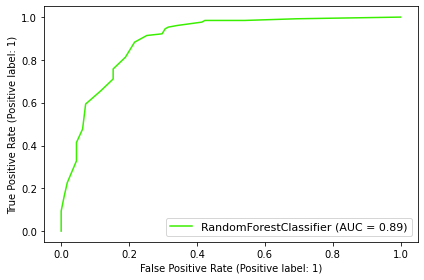

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.8260838963963965


In [72]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

#### Saving Model

In [74]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']